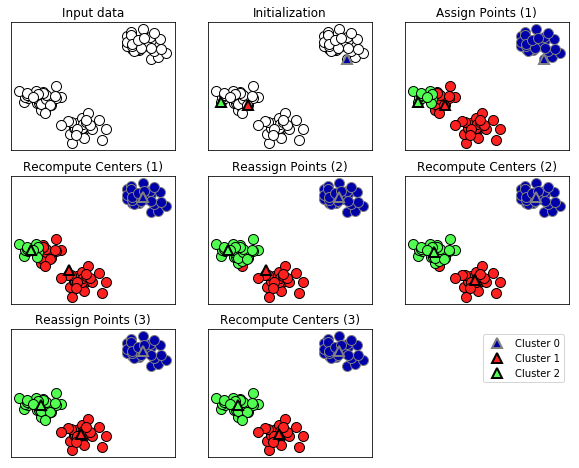

In [3]:
import mglearn
from matplotlib import pyplot as plt

mglearn.plots.plot_kmeans_algorithm()
plt.show()

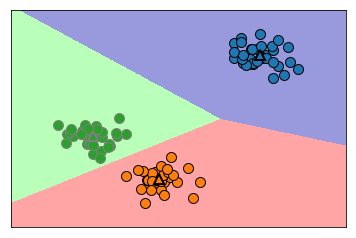

In [5]:
mglearn.plots.plot_kmeans_boundaries()
plt.show()

In [9]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

X, y = make_blobs(random_state=1)

kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

print(f"Cluster membership: {kmeans.labels_}")

kmeans.predict(X)

Cluster membership: [1 0 0 0 2 2 2 0 1 1 0 0 2 1 2 2 2 1 0 0 2 0 2 1 0 2 2 1 1 2 1 1 2 1 0 2 0
 0 0 2 2 0 1 0 0 2 1 1 1 1 0 2 2 2 1 2 0 0 1 1 0 2 2 0 0 2 1 2 1 0 0 0 2 1
 1 0 2 2 1 0 1 0 0 2 1 1 1 1 0 1 2 1 1 0 0 2 2 1 2 1]


array([1, 0, 0, 0, 2, 2, 2, 0, 1, 1, 0, 0, 2, 1, 2, 2, 2, 1, 0, 0, 2, 0,
       2, 1, 0, 2, 2, 1, 1, 2, 1, 1, 2, 1, 0, 2, 0, 0, 0, 2, 2, 0, 1, 0,
       0, 2, 1, 1, 1, 1, 0, 2, 2, 2, 1, 2, 0, 0, 1, 1, 0, 2, 2, 0, 0, 2,
       1, 2, 1, 0, 0, 0, 2, 1, 1, 0, 2, 2, 1, 0, 1, 0, 0, 2, 1, 1, 1, 1,
       0, 1, 2, 1, 1, 0, 0, 2, 2, 1, 2, 1], dtype=int32)

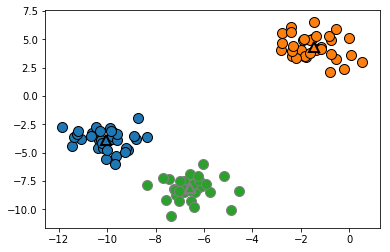

In [11]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], kmeans.labels_, markers='o')
mglearn.discrete_scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], [0, 1, 2], markers='^', markeredgewidth=2)
plt.show()

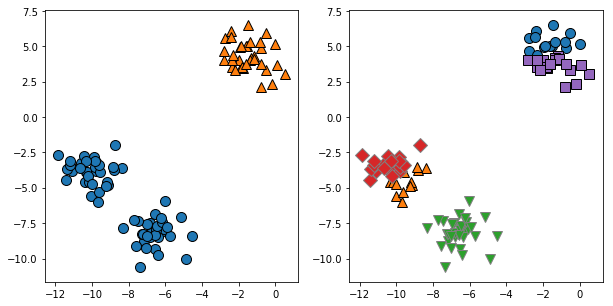

In [13]:
fog, axes = plt.subplots(1, 2, figsize=(10, 5))
# クラスタを2つと5つにしてみる
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
assignments = kmeans.labels_
mglearn.discrete_scatter(X[:, 0], X[:, 1], assignments, ax=axes[0])

kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
assignments = kmeans.labels_
mglearn.discrete_scatter(X[:, 0], X[:, 1], assignments, ax=axes[1])

plt.show()

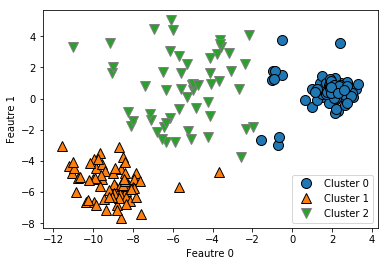

In [14]:
# データセットに対して、正しいクラスタの数がわかっていたとしても、
# kmeansが正しくそれを分類するとは限らない
X_varied, y_varied = make_blobs(n_samples=200, cluster_std=[1.0, 2.5, 0.5], random_state=170)
y_pred = KMeans(n_clusters=3, random_state=0).fit_predict(X_varied)

mglearn.discrete_scatter(X_varied[:, 0], X_varied[:, 1], y_pred)
plt.legend(['Cluster 0', 'Cluster 1', 'Cluster 2'], loc='best')
plt.xlabel('Feautre 0')
plt.ylabel('Feautre 1')
plt.show()

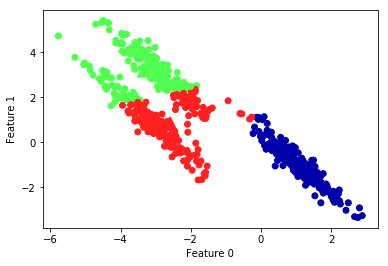

In [17]:
# kmeansは最も近いクラスタセンタへの距離しか考慮しないので、対角線方向に長いデータポイントの取扱には向かない
import numpy as np
from matplotlib import pyplot as plt
X, y = make_blobs(random_state=170, n_samples=600)
rng = np.random.RandomState(74)

transformation = rng.normal(size=(2, 2))
X = np.dot(X, transformation)

kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
y_pred = kmeans.predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap=mglearn.cm3)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='^', c=[0, 1, 2], s=100, linewidths=2, cmap=mglearn.cm3)
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')
plt.show()

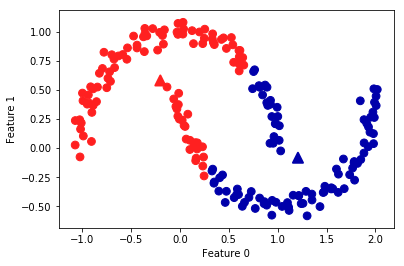

In [19]:
# クラスタが複雑なデータ郡の場合にも不向き
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
y_pred = kmeans.predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap=mglearn.cm2, s=60)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='^', c=[mglearn.cm2(0), mglearn.cm2(1)], s=100, linewidths=2, cmap=mglearn.cm3)
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')
plt.show()

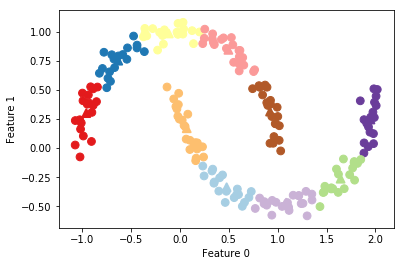

In [22]:
# ベクトル量子化
# 入力次元数の数よりもはるかに多くのクラスタを扱うことが出来る
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

kmeans = KMeans(n_clusters=10, random_state=0)
kmeans.fit(X)
y_pred = kmeans.predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap='Paired', s=60)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='^', c=range(kmeans.n_clusters), s=60, linewidths=2, cmap='Paired')
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')
plt.show()
# 10次元の特徴量とすれば、これを扱える。次元削減手法ではできなかったこと。


In [23]:
distance_features = kmeans.transform(X)
print(f"Distance feature shape: {distance_features.shape}")
print(f"Distance features: {distance_features}")
# kmeansではclusterの数を指定しないといけない、初期化を乱数で行う必要があるのが、欠点

Distance feature shape: (200, 10)
Distance features: [[0.9220768  1.46553151 1.13956805 ... 1.16559918 1.03852189 0.23340263]
 [1.14159679 2.51721597 0.1199124  ... 0.70700803 2.20414144 0.98271691]
 [0.78786246 0.77354687 1.74914157 ... 1.97061341 0.71561277 0.94399739]
 ...
 [0.44639122 1.10631579 1.48991975 ... 1.79125448 1.03195812 0.81205971]
 [1.38951924 0.79790385 1.98056306 ... 1.97788956 0.23892095 1.05774337]
 [1.14920754 2.4536383  0.04506731 ... 0.57163262 2.11331394 0.88166689]]
